In [2]:
from keras import models
from keras import layers
from keras import optimizers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# data setting
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 가장 자주 나타나는 단어 1만개만 사용

In [24]:
# data check
print(train_data[0])
train_labels # 부정 : 0, 긍정 : 1

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [31]:
print(max(np.max(train_data, axis=-1)),max([max(sequence) for sequence in train_data]))

9995 9999


두 개의 값이 왜 다르지???

In [26]:
print(train_data.shape, test_data.shape)

(25000,) (25000,)


In [27]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
# LIst를 Tensor형태로 바꾸자
def vectorize_sequence(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        result[i,sequence] = 1. # 횟수 추가 없이 등장했냐 안했냐만 중요한건가...
    return result

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [5]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

In [40]:
# 16개 유닛을 가진 은닉층 2개로 setting
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # 하나의 값이 0.5 이상인지 이하인지 가지고 판단하기때문에 sigmoid

In [41]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# 훈련 및 검증 데이터 분리
x_val = x_train[:10000]
x_train = x_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

In [44]:
hist = model.fit(x=x_train, y=y_train, epochs=20, batch_size=500, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 371us/step - loss: 0.5107 - acc: 0.7793 - val_loss: 0.3788 - val_acc: 0.8735
Epoch 2/20
15000/15000 [==============================] - 4s 288us/step - loss: 0.3004 - acc: 0.9030 - val_loss: 0.3217 - val_acc: 0.8762
Epoch 3/20
15000/15000 [==============================] - 4s 296us/step - loss: 0.2215 - acc: 0.9273 - val_loss: 0.2794 - val_acc: 0.8908
Epoch 4/20
15000/15000 [==============================] - 4s 297us/step - loss: 0.1741 - acc: 0.9435 - val_loss: 0.2938 - val_acc: 0.8827
Epoch 5/20
15000/15000 [==============================] - 5s 301us/step - loss: 0.1384 - acc: 0.9561 - val_loss: 0.2855 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 5s 313us/step - loss: 0.1138 - acc: 0.9656 - val_loss: 0.2964 - val_acc: 0.8884
Epoch 7/20
15000/15000 [==============================] - 5s 303us/step - loss: 0.0952 - acc: 0.9709 - val_loss: 0.3149 - 

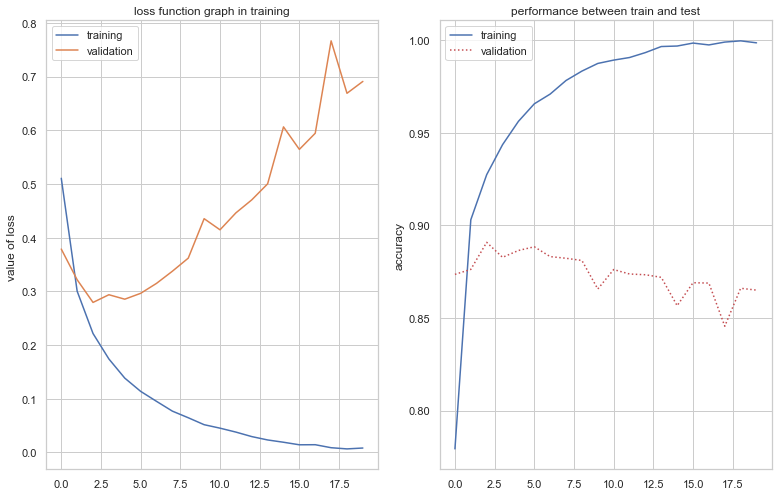

In [49]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label='training')
plt.plot(hist.history['val_loss'], label='validation')
plt.title("loss function graph in training")
plt.ylabel("value of loss ")
plt.legend()
plt.subplot(1,2,2)
plt.title("performance between train and test")
plt.ylabel("accuracy")
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

**validation loss가 epoch=3정도 이후에 계속 상승하는 것 볼 수 있다.**
**overfitting으로 판단하고 epoch를 4번으로 줄여보자**

In [6]:
# epoch=4로 재실행
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x=x_train, y=y_train, epochs=4, batch_size=500)
result = model.evaluate(x=x_test, y=y_test)

Epoch 1/4
25000/25000 [==============================] - 6s 233us/step - loss: 0.4464 - acc: 0.8181
Epoch 2/4
25000/25000 [==============================] - 5s 189us/step - loss: 0.2531 - acc: 0.9100
Epoch 3/4
25000/25000 [==============================] - 5s 190us/step - loss: 0.1970 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 6s 258us/step


In [8]:
print("test data loss : {}, test data accuracy : {}".format(result[0], result[1]))

test data loss : 0.29777845453739166, test data accuracy : 0.8828


In [9]:
# 새로운 데이터에 대해 predict
model.predict(x=x_test)

array([[0.17770875],
       [0.9997507 ],
       [0.6241926 ],
       ...,
       [0.13047436],
       [0.0475764 ],
       [0.53365606]], dtype=float32)

### 추가 실험1 : 은닉층 1개

In [17]:
model1 = models.Sequential()
model1.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer= 'rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
hist = model1.fit(x=x_train, y=y_train, epochs=4, batch_size=500, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 5s 344us/step - loss: 0.5018 - acc: 0.7973 - val_loss: 0.4038 - val_acc: 0.8502
Epoch 2/4
15000/15000 [==============================] - 4s 294us/step - loss: 0.3184 - acc: 0.9026 - val_loss: 0.3235 - val_acc: 0.8818
Epoch 3/4
15000/15000 [==============================] - 4s 293us/step - loss: 0.2454 - acc: 0.9259 - val_loss: 0.2981 - val_acc: 0.8856
Epoch 4/4
15000/15000 [==============================] - 4s 295us/step - loss: 0.2027 - acc: 0.9378 - val_loss: 0.2813 - val_acc: 0.8885


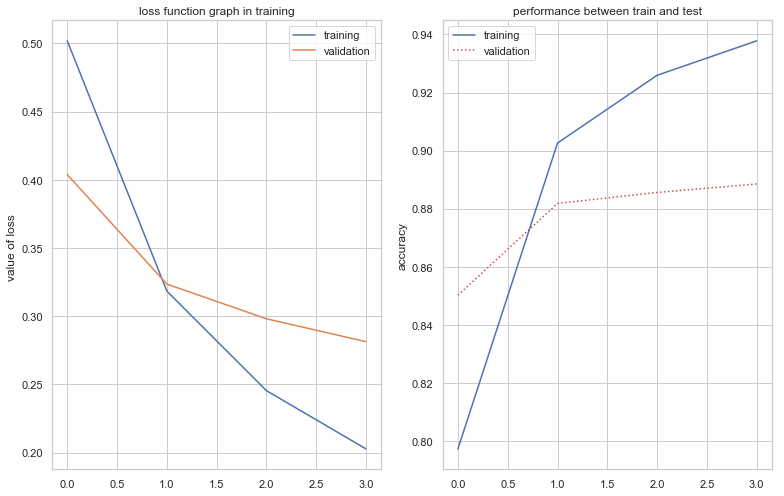

In [18]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label='training')
plt.plot(hist.history['val_loss'], label='validation')
plt.title("loss function graph in training")
plt.ylabel("value of loss ")
plt.legend()
plt.subplot(1,2,2)
plt.title("performance between train and test")
plt.ylabel("accuracy")
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
result1 = model1.evaluate(x_test, y_test)
print("test data loss : {}, test data accuracy : {}".format(result1[0], result1[1]))

25000/25000 [==============================] - 6s 226us/step
test data loss : 0.3003695499706268, test data accuracy : 0.88028


test성능은 살짝 떨어진다.

### 추가실험2 : 은닉층 3개

In [24]:
model2 = models.Sequential()
model2.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

hist = model2.fit(x=x_train, y=y_train, epochs=4, batch_size=500, validation_data=(x_val, y_val))
result2 = model2.evaluate(x=x_test, y=y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 5s 349us/step - loss: 0.5506 - acc: 0.7677 - val_loss: 0.4287 - val_acc: 0.8470
Epoch 2/4
15000/15000 [==============================] - 4s 296us/step - loss: 0.3244 - acc: 0.8984 - val_loss: 0.3096 - val_acc: 0.8867
Epoch 3/4
15000/15000 [==============================] - 4s 296us/step - loss: 0.2192 - acc: 0.9315 - val_loss: 0.2834 - val_acc: 0.8857
Epoch 4/4
25000/25000 [==============================] - 6s 227us/step


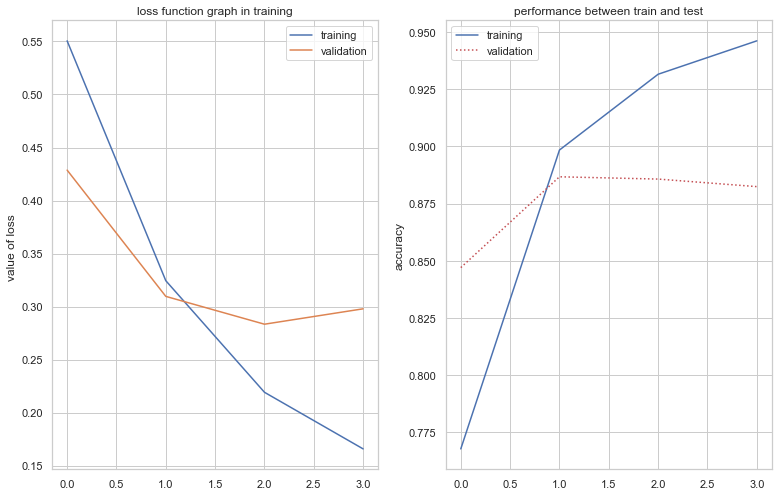

In [25]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label='training')
plt.plot(hist.history['val_loss'], label='validation')
plt.title("loss function graph in training")
plt.ylabel("value of loss ")
plt.legend()
plt.subplot(1,2,2)
plt.title("performance between train and test")
plt.ylabel("accuracy")
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
print("test data loss : {}, test data accuracy : {}".format(result2[0], result2[1]))

test data loss : 0.31488815029621126, test data accuracy : 0.87432


은닉층을 하나 늘렸더니 오히려 성능이 감소함.

### 추가 실험3 : 유닛을 늘려보자

In [27]:
# 첫번째 은닉층만 32 유닛
model3 = models.Sequential()
model3.add(layers.Dense(32, input_shape=(10000,), activation='relu'))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

hist = model3.fit(x=x_train, y=y_train, epochs=4, batch_size=500, validation_data=(x_val, y_val))
result3 = model3.evaluate(x=x_test, y=y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 6s 376us/step - loss: 0.4847 - acc: 0.7848 - val_loss: 0.3481 - val_acc: 0.8781
Epoch 2/4
15000/15000 [==============================] - 5s 324us/step - loss: 0.2721 - acc: 0.9096 - val_loss: 0.3385 - val_acc: 0.8615
Epoch 3/4
15000/15000 [==============================] - 5s 338us/step - loss: 0.2039 - acc: 0.9291 - val_loss: 0.2831 - val_acc: 0.8856
Epoch 4/4
25000/25000 [==============================] - 7s 277us/step


In [28]:
# 두 은닉층 모두 32 유닛
model3 = models.Sequential()
model3.add(layers.Dense(32, input_shape=(10000,), activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

hist = model3.fit(x=x_train, y=y_train, epochs=4, batch_size=500, validation_data=(x_val, y_val))
result3 = model3.evaluate(x=x_test, y=y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 6s 397us/step - loss: 0.5042 - acc: 0.7805 - val_loss: 0.3579 - val_acc: 0.8752
Epoch 2/4
15000/15000 [==============================] - 5s 347us/step - loss: 0.2771 - acc: 0.9045 - val_loss: 0.3552 - val_acc: 0.8485
Epoch 3/4
15000/15000 [==============================] - 5s 328us/step - loss: 0.2003 - acc: 0.9317 - val_loss: 0.3023 - val_acc: 0.8780
Epoch 4/4
25000/25000 [==============================] - 7s 266us/step


In [29]:
# epoch = 10으로 늘리고, 유닛을 둘다 64
model3 = models.Sequential()
model3.add(layers.Dense(64, input_shape=(10000,), activation='relu'))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

hist = model3.fit(x=x_train, y=y_train, epochs=10, batch_size=500, validation_data=(x_val, y_val))
result3 = model3.evaluate(x=x_test, y=y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 7s 446us/step - loss: 0.4810 - acc: 0.7867 - val_loss: 0.3356 - val_acc: 0.8713
Epoch 2/10
15000/15000 [==============================] - 6s 387us/step - loss: 0.2632 - acc: 0.8993 - val_loss: 0.2977 - val_acc: 0.8800
Epoch 3/10
15000/15000 [==============================] - 6s 385us/step - loss: 0.1936 - acc: 0.9293 - val_loss: 0.2729 - val_acc: 0.8892
Epoch 4/10
15000/15000 [==============================] - 6s 394us/step - loss: 0.1332 - acc: 0.9553 - val_loss: 0.3321 - val_acc: 0.8722
Epoch 5/10
15000/15000 [==============================] - 6s 392us/step - loss: 0.1057 - acc: 0.9645 - val_loss: 0.3289 - val_acc: 0.8828
Epoch 6/10
15000/15000 [==============================] - 6s 401us/step - loss: 0.0896 - acc: 0.9685 - val_loss: 0.3439 - val_acc: 0.8823
Epoch 7/10
15000/15000 [==============================] - 6s 386us/step - loss: 0.0620 - acc: 0.9803 - val_loss: 0.3807 - 

In [30]:
# epoch = 10으로 늘리고, 유닛을 128 64
model3 = models.Sequential()
model3.add(layers.Dense(128, input_shape=(10000,), activation='relu'))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

hist = model3.fit(x=x_train, y=y_train, epochs=10, batch_size=500, validation_data=(x_val, y_val))
result3 = model3.evaluate(x=x_test, y=y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 8s 533us/step - loss: 0.4822 - acc: 0.7859 - val_loss: 0.3891 - val_acc: 0.8334
Epoch 2/10
15000/15000 [==============================] - 8s 504us/step - loss: 0.2508 - acc: 0.9080 - val_loss: 0.2920 - val_acc: 0.8817
Epoch 3/10
15000/15000 [==============================] - 7s 491us/step - loss: 0.1739 - acc: 0.9344 - val_loss: 0.3091 - val_acc: 0.8803
Epoch 4/10
15000/15000 [==============================] - 7s 484us/step - loss: 0.1314 - acc: 0.9521 - val_loss: 0.3008 - val_acc: 0.8858
Epoch 5/10
15000/15000 [==============================] - 7s 482us/step - loss: 0.0874 - acc: 0.9697 - val_loss: 0.4293 - val_acc: 0.8599
Epoch 6/10
15000/15000 [==============================] - 7s 491us/step - loss: 0.0794 - acc: 0.9714 - val_loss: 0.4935 - val_acc: 0.8463
Epoch 7/10
15000/15000 [==============================] - 7s 478us/step - loss: 0.0233 - acc: 0.9954 - val_loss: 0.4350 - 

In [31]:
# epoch = 10으로 늘리고, 유닛을 16, 8
# 은닉층을 4개
model3 = models.Sequential()
model3.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

hist = model3.fit(x=x_train, y=y_train, epochs=10, batch_size=500, validation_data=(x_val, y_val))
result3 = model3.evaluate(x=x_test, y=y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 6s 380us/step - loss: 0.5018 - acc: 0.7734 - val_loss: 0.3567 - val_acc: 0.8769
Epoch 2/10
15000/15000 [==============================] - 4s 300us/step - loss: 0.2853 - acc: 0.9029 - val_loss: 0.2919 - val_acc: 0.8891
Epoch 3/10
15000/15000 [==============================] - 4s 297us/step - loss: 0.2083 - acc: 0.9303 - val_loss: 0.2853 - val_acc: 0.8858
Epoch 4/10
15000/15000 [==============================] - 5s 301us/step - loss: 0.1646 - acc: 0.9447 - val_loss: 0.2774 - val_acc: 0.8873
Epoch 5/10
15000/15000 [==============================] - 4s 298us/step - loss: 0.1311 - acc: 0.9597 - val_loss: 0.2995 - val_acc: 0.8798
Epoch 6/10
15000/15000 [==============================] - 4s 298us/step - loss: 0.1132 - acc: 0.9653 - val_loss: 0.3230 - val_acc: 0.8751
Epoch 7/10
15000/15000 [==============================] - 5s 301us/step - loss: 0.0914 - acc: 0.9719 - val_loss: 0.3381 - 

In [33]:
# epoch = 5으로 늘리고, 유닛을 둘다 8
model3 = models.Sequential()
model3.add(layers.Dense(8, input_shape=(10000,), activation='relu'))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

hist = model3.fit(x=x_train, y=y_train, epochs=5, batch_size=500, validation_data=(x_val, y_val))
result3 = model3.evaluate(x=x_test, y=y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 5s 351us/step - loss: 0.5314 - acc: 0.7783 - val_loss: 0.4158 - val_acc: 0.8662
Epoch 2/5
15000/15000 [==============================] - 4s 288us/step - loss: 0.3312 - acc: 0.9017 - val_loss: 0.3206 - val_acc: 0.8855
Epoch 3/5
15000/15000 [==============================] - 4s 285us/step - loss: 0.2439 - acc: 0.9258 - val_loss: 0.2859 - val_acc: 0.8903
Epoch 4/5
15000/15000 [==============================] - 5s 300us/step - loss: 0.1929 - acc: 0.9411 - val_loss: 0.2798 - val_acc: 0.8869
Epoch 5/5
25000/25000 [==============================] - 5s 210us/step


In [34]:
# epoch = 5으로 늘리고, 유닛을 둘다 8
# 은닉층 3개
model3 = models.Sequential()
model3.add(layers.Dense(8, input_shape=(10000,), activation='relu'))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

hist = model3.fit(x=x_train, y=y_train, epochs=5, batch_size=500, validation_data=(x_val, y_val))
result3 = model3.evaluate(x=x_test, y=y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 5s 358us/step - loss: 0.5686 - acc: 0.7830 - val_loss: 0.4645 - val_acc: 0.8628
Epoch 2/5
15000/15000 [==============================] - 4s 287us/step - loss: 0.3749 - acc: 0.8923 - val_loss: 0.3505 - val_acc: 0.8792
Epoch 3/5
15000/15000 [==============================] - 4s 288us/step - loss: 0.2718 - acc: 0.9189 - val_loss: 0.3067 - val_acc: 0.8834
Epoch 4/5
15000/15000 [==============================] - 4s 285us/step - loss: 0.2107 - acc: 0.9357 - val_loss: 0.2862 - val_acc: 0.8874
Epoch 5/5
25000/25000 [==============================] - 5s 212us/step


In [35]:
# epoch = 5으로 늘리고, 유닛을 둘다 8
# 은닉층 4개
model3 = models.Sequential()
model3.add(layers.Dense(8, input_shape=(10000,), activation='relu'))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

hist = model3.fit(x=x_train, y=y_train, epochs=5, batch_size=500, validation_data=(x_val, y_val))
result3 = model3.evaluate(x=x_test, y=y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 6s 367us/step - loss: 0.6395 - acc: 0.6933 - val_loss: 0.5848 - val_acc: 0.7350
Epoch 2/5
15000/15000 [==============================] - 4s 289us/step - loss: 0.5203 - acc: 0.8427 - val_loss: 0.4898 - val_acc: 0.8465
Epoch 3/5
15000/15000 [==============================] - 4s 290us/step - loss: 0.4139 - acc: 0.9027 - val_loss: 0.4074 - val_acc: 0.8779
Epoch 4/5
15000/15000 [==============================] - 4s 290us/step - loss: 0.3162 - acc: 0.9296 - val_loss: 0.3379 - val_acc: 0.8895
Epoch 5/5
25000/25000 [==============================] - 8s 326us/step


In [36]:
# epoch = 5으로 늘리고, 유닛을 둘다 8
# 은닉층 3개
# optimizer = adam
model3 = models.Sequential()
model3.add(layers.Dense(8, input_shape=(10000,), activation='relu'))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

hist = model3.fit(x=x_train, y=y_train, epochs=5, batch_size=500, validation_data=(x_val, y_val))
result3 = model3.evaluate(x=x_test, y=y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 6s 391us/step - loss: 0.6248 - acc: 0.7156 - val_loss: 0.5356 - val_acc: 0.8347
Epoch 2/5
15000/15000 [==============================] - 4s 296us/step - loss: 0.4140 - acc: 0.8829 - val_loss: 0.3527 - val_acc: 0.8765
Epoch 3/5
15000/15000 [==============================] - 4s 294us/step - loss: 0.2645 - acc: 0.9165 - val_loss: 0.2900 - val_acc: 0.8872
Epoch 4/5
15000/15000 [==============================] - 4s 288us/step - loss: 0.1917 - acc: 0.9393 - val_loss: 0.2759 - val_acc: 0.8892
Epoch 5/5
25000/25000 [==============================] - 5s 217us/step


In [39]:
# epoch = 5으로 늘리고, 유닛을 둘다 16
# 은닉층 2개
# relu 대신 tanh
model3 = models.Sequential()
model3.add(layers.Dense(16, input_shape=(10000,), activation='tanh'))
model3.add(layers.Dense(16, activation='tanh'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

hist = model3.fit(x=x_train, y=y_train, epochs=5, batch_size=500, validation_data=(x_val, y_val))
result3 = model3.evaluate(x=x_test, y=y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 6s 387us/step - loss: 0.4950 - acc: 0.7991 - val_loss: 0.3743 - val_acc: 0.8656
Epoch 2/5
15000/15000 [==============================] - 4s 299us/step - loss: 0.2871 - acc: 0.9075 - val_loss: 0.3159 - val_acc: 0.8698
Epoch 3/5
15000/15000 [==============================] - 5s 304us/step - loss: 0.2032 - acc: 0.9311 - val_loss: 0.2723 - val_acc: 0.8886
Epoch 4/5
15000/15000 [==============================] - 4s 297us/step - loss: 0.1521 - acc: 0.9517 - val_loss: 0.2760 - val_acc: 0.8862
Epoch 5/5
25000/25000 [==============================] - 6s 240us/step
